# Data Generation Notebook

We use this notebook to generate all non-standard datasets used in the level 0 - 10 notebooks.

All datasets will be saved in a single .h5 file. Features will be saved under the 'X' key and targets will be saved under the 'Y' key. All features will be 2 dimensional arrays of size (num_examples, num_features). This includes the case where there is only 1 feature.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def save_hdf5(filename, X, Y, num_train, num_val, num_test):
    indices = np.arange(num_train+num_val+num_test)
    np.random.shuffle(indices)
    X.iloc[indices[:num_train]].to_hdf(save_file, key='X_train', mode='w')
    Y.iloc[indices[:num_train]].to_hdf(save_file, key='Y_train', mode='a')
    X.iloc[indices[num_train:num_train+num_val]].to_hdf(save_file, key='X_val', mode='a')
    Y.iloc[indices[num_train:num_train+num_val]].to_hdf(save_file, key='Y_val', mode='a')
    X.iloc[indices[num_train+num_val:num_train+num_val+num_test]].to_hdf(save_file, key='X_test', mode='a')
    Y.iloc[indices[num_train+num_val:num_train+num_val+num_test]].to_hdf(save_file, key='Y_test', mode='a')

### Level 1 - Free falling body 

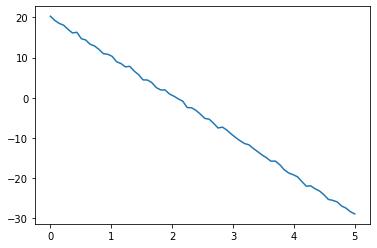

In [75]:
initial_v = 20
gravitational_constant = -9.8
noise_stddev = .25
num_train = 50
num_val = 10
num_test = 10
num_total = num_train + num_val + num_test

# We add error to the measurement so that the problem is not too trivial.
noise_vector = np.random.normal(loc=0.0, scale=noise_stddev, size=[num_total])

t = np.linspace(0, 5, num_total)
# Integral of Newton's law.
v_t = gravitational_constant * t + initial_v
v_t += noise_vector
X = pd.DataFrame(np.expand_dims(t, 1), columns=['t'])
Y = pd.DataFrame(v_t, columns=['v'])
assert X.shape == (num_total, 1)
plt.plot(X.values, Y.values)
plt.show()
save_file = 'data/free_falling_body.h5'
save_hdf5(save_file, X,Y,num_train, num_val, num_test)

### Level 1 - Projectile Motion

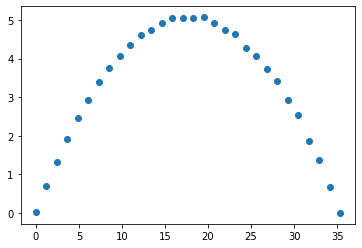

In [86]:
initial_v = 20
launch_angle = np.pi / 6
gravitational_constant = -9.8
noise_stddev = .05

num_train = 10
num_val = 10
num_test = 10
num_total = num_train + num_val + num_test


noise_vector = np.random.normal(loc=0.0, scale=noise_stddev, size=[num_total])
# Equation for maximum range of a parabolic trajectory.
x_max = initial_v ** 2 * np.sin(2 * launch_angle) / (-gravitational_constant)

X = np.linspace(0, x_max, num_total)
# Equation for height of parabolic trajectory as a function of x
Y = np.tan(launch_angle) * x + \
    gravitational_constant * np.square(x) / (2 * initial_v**2 * np.cos(launch_angle)**2)
Y += noise_vector

X = pd.DataFrame(X, columns=['x'])
Y = pd.DataFrame(Y, columns=['y'])

plt.scatter(X, Y)
plt.show()

save_file = 'data/projectile_motion.h5'
save_hdf5(save_file, X,Y,num_train, num_val, num_test)

### Level 1 - Orbiting body classification

Given the radius and velocity of a body, we can calculate its energy. For $E \geq 0$, the body is ejected (hyperbolic, parabolic orbit). For $E < 0$, the body is unable to escape (circular, elliptical orbit). 

We measure $r$ in astronomical units and time in years, so that $GM_{\odot} = \frac{4\pi^2 (AU^3)}{(Yr^2)}$ and take the mass of all bodies to be 1.

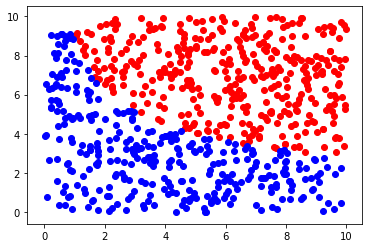

In [93]:
num_train = 500
num_val = 100
num_test = 100
num_total = num_train + num_val + num_test

r = np.random.uniform(.01, 10, size=[num_total,1])
v = np.random.uniform(0,10, size=[num_total,1])

GM = 4 * np.pi ** 2

# E = Kinetic + Potential Energy
E = .5 * np.square(v) - GM / r

plt.scatter(r[np.where(E>=0)[0]], v[np.where(E>=0)[0]], c='r')
plt.scatter(r[np.where(E<0)[0]], v[np.where(E<0)[0]], c='b')
plt.show()

X = pd.DataFrame(np.concatenate([r,v], axis=1), columns=['r', 'v'])
Y = pd.DataFrame(np.array(E<0, dtype=np.float32), columns=['y'])

save_file = 'data/orbit_classification.h5'
save_hdf5(save_file, X,Y,num_train, num_val, num_test)